<a href="https://colab.research.google.com/github/Rey-uni/Vje-be/blob/main/AI_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESIJA
---
Parametri modela = nagib, odsječak na y osi



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#moramo nati napraviti matricu s nasumičnim brojevime te od nje dataframe
#randn daje normalnu rapodjelu
np.random.seed(42) #utječemo na ponovljivost pokusa jer su pseudonasumični
blood_pressure = 2 * np.random.rand(100, 1)
inflammation_level = 4 + 3 * blood_pressure + np.random.randn(100, 1)

data = pd.DataFrame({
'Blood Pressure (mmHg)': blood_pressure.flatten(),
'Inflammation Level (Biomarker)': inflammation_level.flatten()
})

print(data.head())

data.describe().T[["std","max"]].T #da nam samo da ta 2 stupca tj reda

   Blood Pressure (mmHg)  Inflammation Level (Biomarker)
0               0.749080                        6.334288
1               1.901429                        9.405278
2               1.463988                        8.483724
3               1.197317                        5.604382
4               0.312037                        4.716440


,Blood Pressure (mmHg),Inflammation Level (Biomarker)
std,0.594979,1.879138
max,1.973774,11.044395


In [ ]:
data.columns

Index(['Blood Pressure (mmHg)', 'Inflammation Level (Biomarker)'], dtype='object')

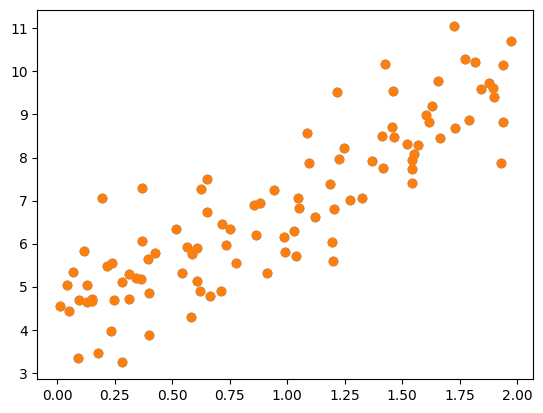

In [ ]:
plt.scatter(data['Blood Pressure (mmHg)'],data['Inflammation Level (Biomarker)'])
plt.scatter(data.iloc[:,0], data.iloc[:,1]) #isto

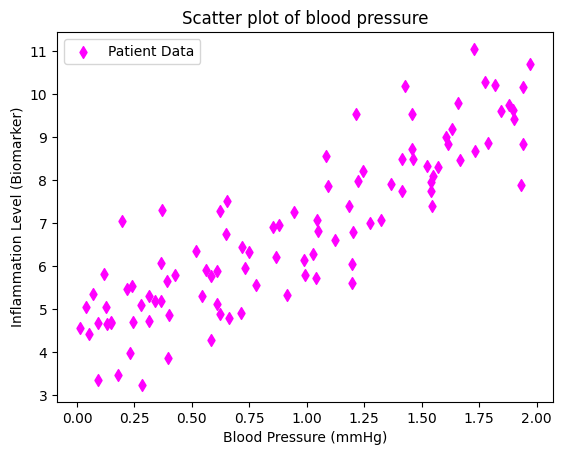

In [ ]:
plt.scatter(data['Blood Pressure (mmHg)'],data['Inflammation Level (Biomarker)'], color="magenta", label="Patient Data", marker='d') #dijamant
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Inflammation Level (Biomarker)')
plt.title("Scatter plot of blood pressure")
plt.legend()
plt.show()

In [ ]:
bp_train, pr_test, infl_train, inf_test = train_test_split(blood_pressure, inflammation_level, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(bp_train, infl_train) #on je naučioodsječak i nagib

LinearRegression()

In [ ]:
model.intercept_, model.coef_ # za 1 pomak x ide pomak vrijednosti y za 3 (stvarni svijet) uporaba

(array([4.14291332]), array([[2.79932366]]))

In [ ]:
#s naredbom predict provjeriti na testu ako radi?

infl_pred = model.predict(pr_test)
serija = pd.Series(np.squeeze(infl_pred)) #prebacivanje array u panda series
serija

,0
0,4.498754
1,9.152736
2,8.466439
3,7.852142
4,5.591731
5,6.607172
6,5.778528
7,8.975125
8,4.258159
9,6.239831


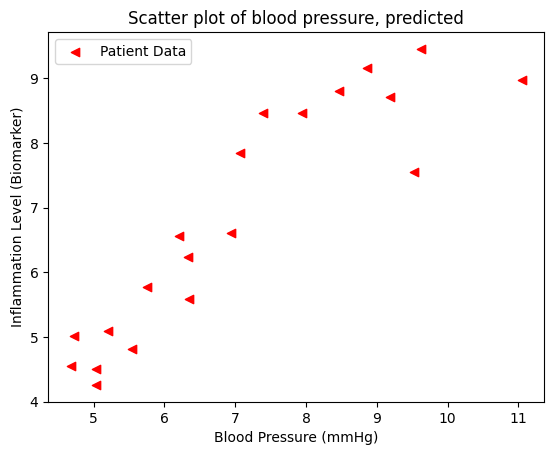

In [ ]:
plt.scatter(inf_test,infl_pred, color="red", label="Patient Data", marker='<')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Inflammation Level (Biomarker)')
plt.title("Scatter plot of blood pressure, predicted")
plt.legend()
plt.show()

In [ ]:
#napravi dataframe infl test i pred

df = pd.DataFrame({
'Predicted': infl_pred.flatten(),
'Test': inf_test.flatten()})
df
#ili preko dictionarya? sto je ovo moje zapravo
rez=pd.DataFrame([np.squeeze(inf_test), np.squeeze(infl_pred)]).T
rez.columns=["test","pred"]
rez


,test,pred
0,5.037904,4.498754
1,8.865488,9.152736
2,7.396518,8.466439
3,7.065746,7.852142
4,6.343712,5.591731
5,6.942462,6.607172
6,5.757981,5.778528
7,11.044395,8.975125
8,5.038909,4.258159
9,6.334288,6.239831


In [ ]:
#Datafram je indeksirana matrica

In [ ]:
ddf=df["Predicted"]-df["Test"]
ddf.abs().sum() #gleda se ukupna greška kod modelA

np.float64(11.826851558379554)

In [ ]:
mse = mean_squared_error(inf_test, infl_pred)
mse

0.6536995137170021

Poanta skaliranja je da podatke različite veličine koji ulaze u regresiju.
**Uvijek je sigurnije skalirati.** Skalira se x.